# **基于多种分类算法的糖尿病结果预测**

根据美国疾病控制和预防中心的数据，目前约有七分之一的美国成年人患有糖尿病。

但到2050年，这一比率可能会飙升至多达三分之一。

考虑到这一点，我们今天要做的事情：学习如何使用机器学习来帮助我们预测糖尿病。

## 1. 引入需要的库

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#预处理模块
from sklearn.model_selection import train_test_split #拆分训练与测试集
from sklearn.preprocessing import MinMaxScaler #归一化
from sklearn.preprocessing import StandardScaler #标准化

#模型
from sklearn.neighbors import KNeighborsClassifier #KNN分类器
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.ensemble import RandomForestClassifier #随机森林
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosting
from sklearn.svm import SVC #SVM
from sklearn.neural_network import MLPClassifier #感知器

## 2. 载入糖尿病检测数据

In [3]:
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)
print("dimension of diabetes data: {}".format(diabetes.shape))
diabetes.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
dimension of diabetes data: (768, 9)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

- 糖尿病数据集由 768 个样本组成，每个样本有9个特征

我们需要初步分析标签信息

`outcome` 是我们要预测的特征，0表示没有糖尿病，1表示糖尿病。

在这768个数据点中，500个标记为0，268标记为1

Outcome
0    500
1    268
dtype: int64


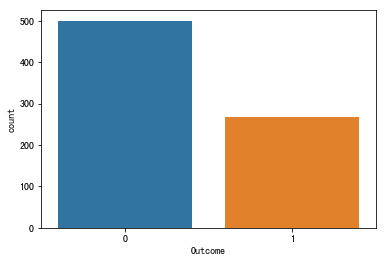

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
print(diabetes.groupby('Outcome').size())

sns.countplot(diabetes['Outcome'], label="Count")
plt.show()

print(diabetes.info())

## 3. KNN

- k-NN算法可以说是最简单的机器学习算法。构建模型仅包括存储训练数据集。

- 对新数据点进行预测，该算法在训练数据集中找到最接近的数据点，标记最近邻标签。

**首先，我们来研究一下我们是否可以确认，模型复杂性和准确性之间的关系：**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], 
                                                    diabetes['Outcome'], 
                                                    stratify=diabetes['Outcome'], 
                                                    random_state=66)

training_accuracy = []
test_accuracy = []
# 最近邻点数 1 到 10
neighbors_settings = range(1, 11)

In [6]:
for n_neighbors in neighbors_settings:
    # 建立模型
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # 记录训练精度
    training_accuracy.append(knn.score(X_train, y_train))
    # 记录测试精度
    test_accuracy.append(knn.score(X_test, y_test))

我们将模型结果进行可视化，看一下不同的K值对模型的影响

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


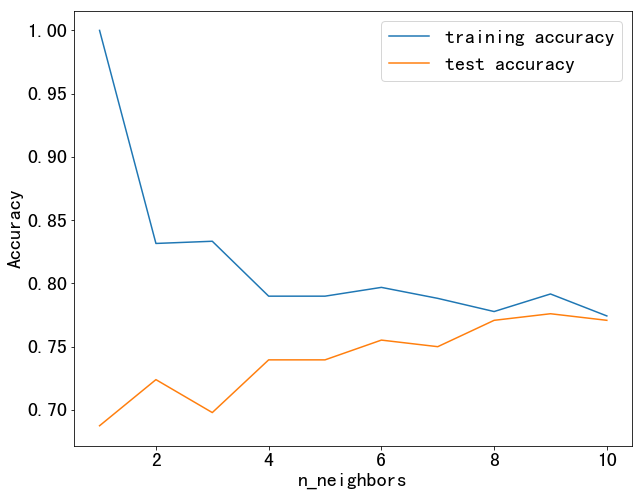

In [14]:
plt.figure(figsize=(10,8))
plt.rcParams['font.size']=20
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

上图中 y 轴表示训练和测试集精度，x 轴表示 n_neighbors 的设置。

如果我们选择单个最近邻居，则对训练集的预测是完美的。

但是当考虑更多邻居时，训练准确度下降，表明使用单个最近邻居会导致模型过于复杂。最好的模型是大约9个邻居。

该图表明我们应该选择 n_neighbors=9。

## 4. 逻辑回归

Logistic 回归是最常见的分类算法之一，我们尝试用逻辑回归去处理这类问题

In [15]:
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))
print(50*'-')

logreg001 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))
print(50*'-')

logreg100 = LogisticRegression(C=100, solver='liblinear').fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.781
Test set accuracy: 0.771
--------------------------------------------------
Training set accuracy: 0.700
Test set accuracy: 0.703
--------------------------------------------------
Training set accuracy: 0.785
Test set accuracy: 0.766


C = 1的默认值，模型达到78％的训练精度和77％的测试精度。

使用C = 0.01导致训练和测试集的准确度较低。

使用C = 100会导致训练集的准确度稍微提高一点，测试集上的精度稍微降低，因此较少的正则化和更复杂的模型可能不会比默认设置有更好的泛化能力。

因此，我们应该选择默认值C = 1。

最后，让我们使用正则化参数 C 的三个不同设置来可视化模型所学习的系数。

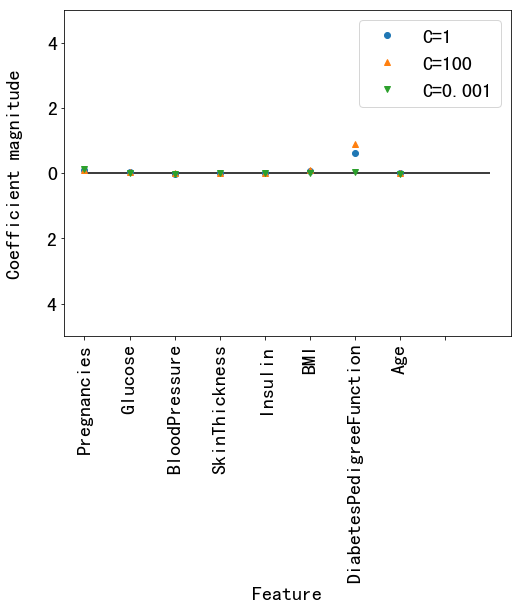

In [16]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]

plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

更强的正则化（C = 0.001）将系数越来越推向零。

我们还可以看到 “DiabetesPedigreeFunction” 的特征，对于C = 100，C = 1和C = 0.001，系数是正的。

这表明“DiabetesPedigreeFunction”与“糖尿病”有关。

## 5. 决策树

### 5.1 使用默认参数训练模型

In [17]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.714


训练集的准确率为100％，而测试集的准确性要差得多。这表明决策树模型过度拟合，并且不能很好地推广到新数据。

因此，我们需要对树模型进行预修剪。

### 5.2 我们设置 max_depth=3，限制树的深度减少过度拟合。
- 这导致训练集的准确度较低，但是对测试集精度有改进。

In [18]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.740


### 5.3 决策树中的特征重要性

特征重要性评估每个特征对树的决策的重要性。

对于每个特征，它是0到1之间的数字，其中0表示“不重要属性”，1表示“重要属性”。

Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


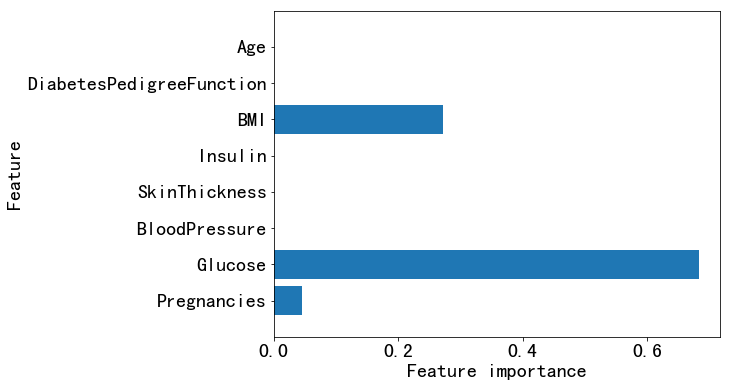

In [19]:
print("Feature importances:\n{}".format(tree.feature_importances_))
# 我们可以可视化出决策树的特征重要性
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree)

特征 "Glucose" 是最重要的特征

## 6. 随机森林

### 6.1 让我们在糖尿病数据集上应用由100棵树组成的随机森林：

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.786


随机森林给出了 78.6％ 的准确度，优于逻辑回归模型或单个决策树，但是没有调整任何参数。

### 6.2 我们可以调整 max_features 设置，以查看是否可以改进模型结果

In [21]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.800
Accuracy on test set: 0.755


上述模型测试集精度没有明显提高，这表明随机森林的默认参数运作良好。

### 6.3  随机森林中的特征重要性

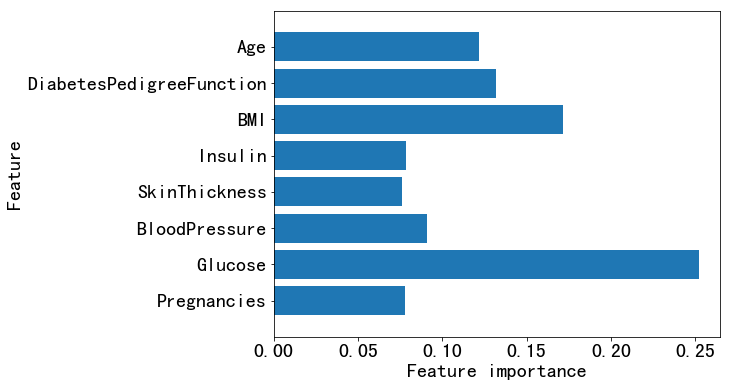

In [22]:
plot_feature_importances_diabetes(rf)

与单一决策树类似，随机森林也对“Glucose”特征给予了很多重视，但它也选择“ BMI” 作为整体上第二个最具信息性的特征。

构建随机森林的随机性迫使算法考虑许多可能性，结果是随机森林捕获的数据特征比单个树更广泛。

## 7. Gradient Boosting

### 7.1 通过默认参数进行训练

In [23]:
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.917
Accuracy on test set: 0.792


### 7.2 模型过拟合
模型可能存在过度拟合。
我们可以通过限制最大深度或降低学习率减少过度拟合。

In [24]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

print(50*'-')

gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

Accuracy on training set: 0.804
Accuracy on test set: 0.781
--------------------------------------------------
Accuracy on training set: 0.802
Accuracy on test set: 0.776


正如预期的那样，降低模型复杂度的两种方法都降低了训练集的准确性。

但是，在这种情况下，这些方法都没有增加测试集的泛化性能。

### 7.3 特征权重可视化

我们可以将特征重要性可视化，以便更深入地了解我们的模型，即使我们对模型并不满意：

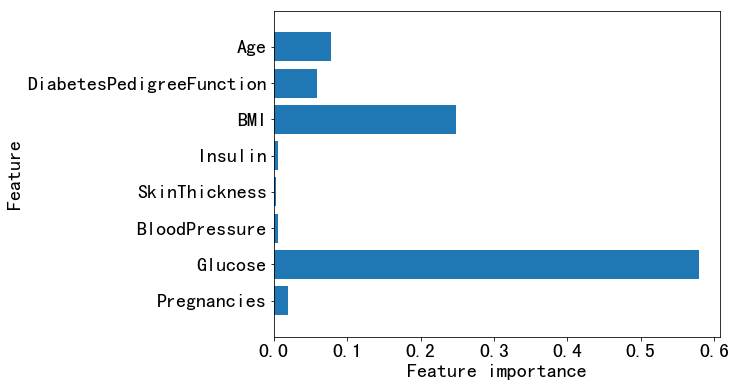

In [25]:
plot_feature_importances_diabetes(gb1)

我们可以看到gradient boosted trees的特征重要性与随机森林的特征重要性有些相似，它给出了这种情况下所有特征的权重。

## 8. 支持向量机
### 8.1 默认参数下的支持向量机

In [26]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.65


该模型在训练集上得分很高，在测试集上只有65％的准确率。

### 8.2 缩放数据

SVM 需要特征在一个较小的范围之内。我们需要重新调整所有特征的数据范围：

In [27]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.fit_transform(X_test.astype(float))

svc = SVC(gamma='auto')
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.77
Accuracy on test set: 0.77


缩放数据对模型产生了巨大的影响。但实际上是不合适的，

从这里开始，我们可以尝试增加C或gamma以适应更复杂的模型。

### 8.3 调整支持向量机的参数

In [28]:
svc = SVC(C=1000, gamma='auto')
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.790
Accuracy on test set: 0.797


在这里，增加C允许我们改进模型，从而使测试集精度达到79.7％。

## 9. 神经网络
### 9.1 默认参数下的多层感知机

In [29]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.73
Accuracy on test set: 0.72


多层感知器（MLP）的准确性不如其他模型好，这可能是由于数据的缩放。

深度学习算法还需要所有输入数据以类似的方式变化，理想情况下均值为0，方差为1。

### 9.2 数据归一化，神经网络
我们必须重新调整数据，以满足这些要求。

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.fit_transform(X_test.astype(float))

mlp = MLPClassifier(random_state=0, max_iter=10000)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.771


### 9.3 调整神经网络的参数，提高模型泛化能力

Accuracy on training set: 0.806
Accuracy on test set: 0.797


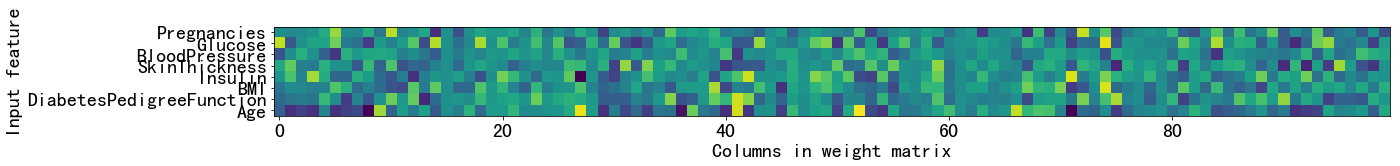

In [42]:
# 让我们增加alpha参数并添加更强的权重正则化：
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

plt.figure(figsize=(20, 15))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.show()

从热图中可以很快地指出哪些特征（特征）与其他特征相比具有相对较低的权重。

# **总结**

我们实践了各种用于分类和回归的机器学习模型，它们各有优点和缺点，以及如何控制每个模型的复杂性。我们看到，对于许多算法，设置正确的参数对于良好的性能非常重要。

我们应该能够知道如何应用，调整和分析我们上面练习的模型。